In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
%matplotlib inline


In [ ]:
data = pd.read_csv("HR_comma_sep.csv")

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.shape

(14999, 10)

In [ ]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
left = data[data.left==1]
left.shape

(3571, 10)

In [ ]:
not_left = data[data.left==0]
not_left.shape

(11428, 10)

In [ ]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='left', ylabel='count'>

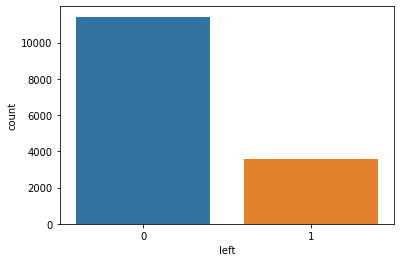

In [ ]:
sns.countplot(x="left",data=data)

<Axes: xlabel='salary'>

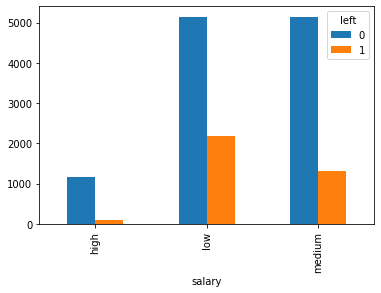

In [ ]:
pd.crosstab(data.salary,data.left).plot(kind="bar")

<Axes: xlabel='salary', ylabel='count'>

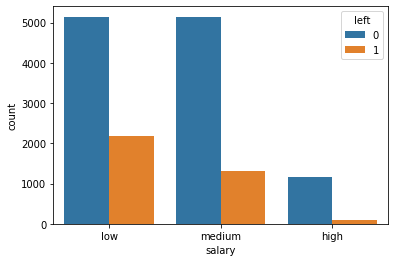

In [ ]:
sns.countplot(x="salary",hue="left",data=data)

<Axes: xlabel='number_project', ylabel='count'>

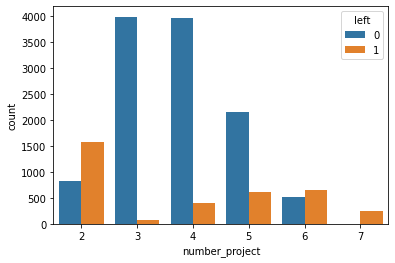

In [ ]:
sns.countplot(x="number_project",hue="left",data=data)

<Axes: xlabel='Department', ylabel='count'>

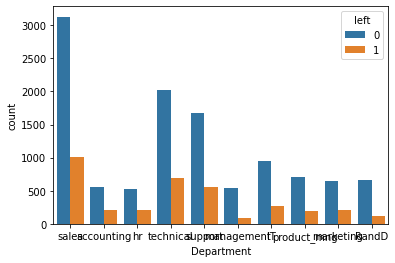

In [ ]:
sns.countplot(x="Department",hue="left",data=data)

<Axes: ylabel='Frequency'>

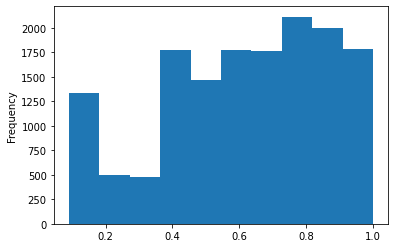

In [ ]:
data['satisfaction_level'].plot.hist()

In [ ]:
#we consider independent variables as satisfaction_level,salary,avearge_monthly_hours,promotion

In [46]:
indata=data[['satisfaction_level','salary','average_montly_hours','promotion_last_5years']]

In [38]:
indata

,satisfaction_level,salary,average_montly_hours,promotion_last_5years
0,0.38,low,157,0
1,0.80,medium,262,0
2,0.11,medium,272,0
3,0.72,low,223,0
4,0.37,low,159,0
...,...,...,...,...
14994,0.40,low,151,0
14995,0.37,low,160,0
14996,0.37,low,143,0
14997,0.11,low,280,0


In [32]:
dsalary= pd.get_dummies(data.salary)
dsalary

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [47]:
indata= pd.concat([indata,dsalary],axis='columns')

In [48]:
indata

,satisfaction_level,salary,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,low,157,0,0,1,0
1,0.80,medium,262,0,0,0,1
2,0.11,medium,272,0,0,0,1
3,0.72,low,223,0,0,1,0
4,0.37,low,159,0,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,low,151,0,0,1,0
14995,0.37,low,160,0,0,1,0
14996,0.37,low,143,0,0,1,0
14997,0.11,low,280,0,0,1,0


In [50]:
indata.drop(['salary'],axis=True,inplace=True)

In [51]:
indata

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [52]:
X=indata

In [53]:
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [54]:
y = data.left

In [55]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [60]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
1670,0.44,141,0,0,0,1
13378,0.55,194,0,0,0,1
10233,0.72,210,0,0,0,1
4719,0.96,177,0,0,1,0
7003,0.96,198,0,0,1,0
...,...,...,...,...,...,...
11275,0.56,211,1,0,1,0
3828,0.58,262,0,1,0,0
4645,0.85,273,0,0,0,1
6069,0.54,278,0,0,0,1


In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression()

In [63]:
model.fit(X_train,y_train)

LogisticRegression()

In [64]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [65]:
model.score(X_test,y_test)

0.7788888888888889

Employees who left had less satisfaction level,promotion last five years,work accident,more average monthly hours 